In [2]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [4]:
df=pd.read_csv("all.csv")

In [1]:
#(df.columns)

In [10]:
df.shape

(569, 82)

## Census Data 2001

In [5]:
df=df.loc[df.Persons>100000]

# Question What are all the features which are impacted by the population of the region?

In [6]:
df.corr()["Persons"].sort_values(ascending=False)

Persons                                   1.000000
Males                                     0.998840
Females                                   0.998627
X15...59.years                            0.990018
Non.workers                               0.986814
Religeon.1.Population                     0.973870
Number.of.households                      0.973726
Males..Literate                           0.966756
X5...14.years                             0.965899
Total.workers                             0.962144
X60.years.and.above..Incl..A.N.S..        0.950701
X0...4.years                              0.948163
Main.workers                              0.947227
Total.Educated                            0.946548
Persons..literate                         0.946466
Primary                                   0.940702
Below.Primary                             0.905301
Females..Literate                         0.905230
Middle                                    0.880737
Matric.Higher.Secondary.Diploma

## Answer:In top 5 correlated features, rest all make sense but 'Non.workers' is something which stands out,this shows region with high population faces the problem of unemployment too

In [9]:
from feature_selector import FeatureSelector
# Features are in train and labels are in train_labels
fs = FeatureSelector(data = df.drop(columns = 'Persons'), labels = df['Persons'])

In [10]:
fs.identify_collinear(correlation_threshold = 0.98)

10 features with a correlation magnitude greater than 0.98.



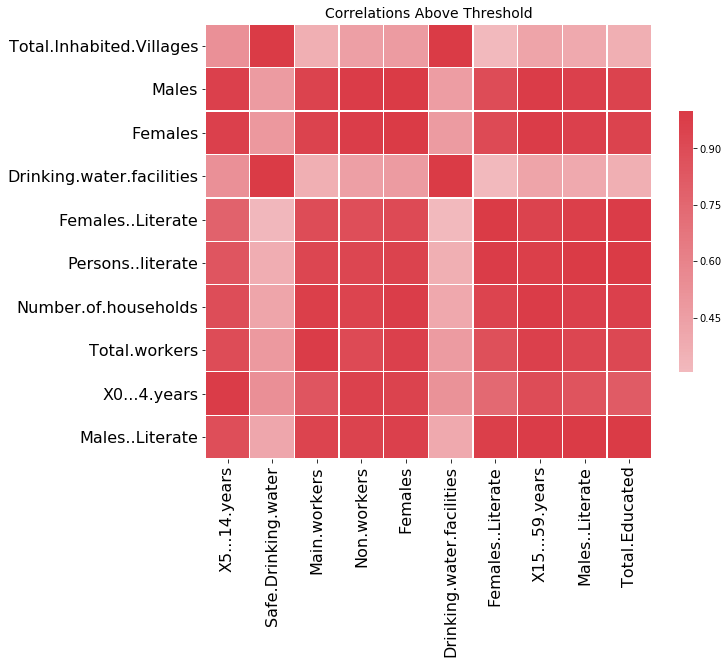

In [11]:
fs.plot_collinear()

# Question: Finding how education level varies with State

Text(0.5, 1.0, 'Which state has what fraction of people in what bracket?')

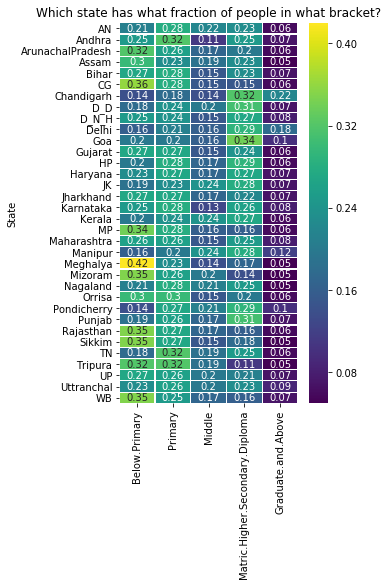

In [33]:
education_cols = ['Below.Primary', 'Primary', 'Middle', 'Matric.Higher.Secondary.Diploma',
                'Graduate.and.Above']
temp = df[education_cols + ['State']].groupby('State').sum()

plt.figure(figsize=(4, 7))
sns.heatmap(np.round(temp.T / temp.sum(axis=1), 2).T, cmap='viridis',
            linewidths=0.11, linecolor='white', annot=True)
plt.title('Which state has what fraction of people in what bracket?')

# Answer: Graduate and Above has less values in almost all the states except for Chandigarh and Delhi,whereas Meghalaya is leading in the category of Below primary.

# Question : Age distribution across States

Text(0.5, 1.0, 'Age group distribution over states')

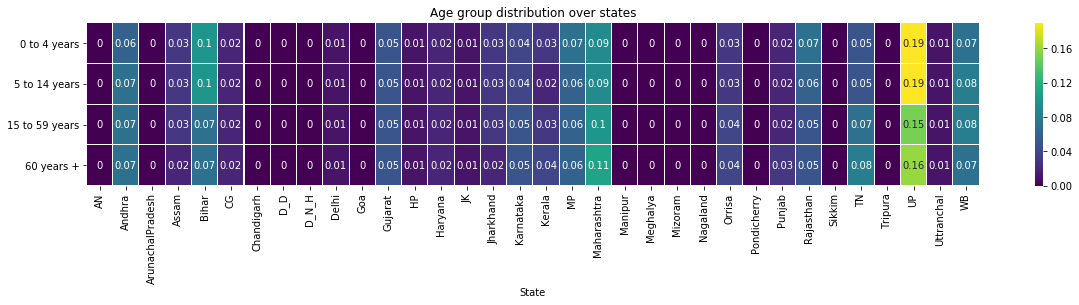

In [66]:
age_cols = ['X0...4.years','X5...14.years',
            'X15...59.years','X60.years.and.above..Incl..A.N.S..']
temp = df[age_cols+['State']].groupby('State').sum()

plt.figure(figsize=(20, 3))
ax = plt.gca()
temp.columns=['0 to 4 years', '5 to 14 years', '15 to 59 years', '60 years +']
sns.heatmap(np.round(temp / temp.sum(axis=0), 2).T, linecolor='white',
            linewidths=0.01, cmap='viridis', annot=True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
plt.title('Age group distribution over states')

# UP has considerable value for all the age groups,also in every state there is no huge difference observed in the categories

# Question : Let's see the distribution of Workforce across India

Text(0.5, 1.0, 'Working class distribution over states. Rows sum to 1')

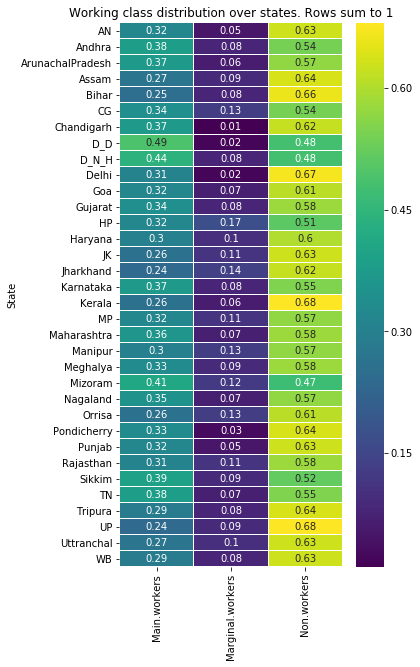

In [67]:
worker_cols = ['Main.workers', 'Marginal.workers', 'Non.workers']
temp = df[worker_cols+['State']].groupby('State').sum()

plt.figure(figsize=(5, 10))

sns.heatmap(np.round(temp.T / temp.sum(axis=1), 2).T, linecolor='white',
            linewidths=0.01, cmap='viridis', annot=True)
plt.title('Working class distribution over states. Rows sum to 1')

# Non Workers are dominating every state,there is little improvment in Mizoram and D_N_H,while UP and Jharkhand has the lowest fraction of 'Main workers'

## Census Data 2011

In [44]:
df_2011=pd.read_csv("india-census/india-districts-census-2011.csv")

In [1]:
#(df_2011.columns.values)

# Question : Education distribution across the states

Text(0.5, 1.0, 'Which state has what fraction of people in what bracket?')

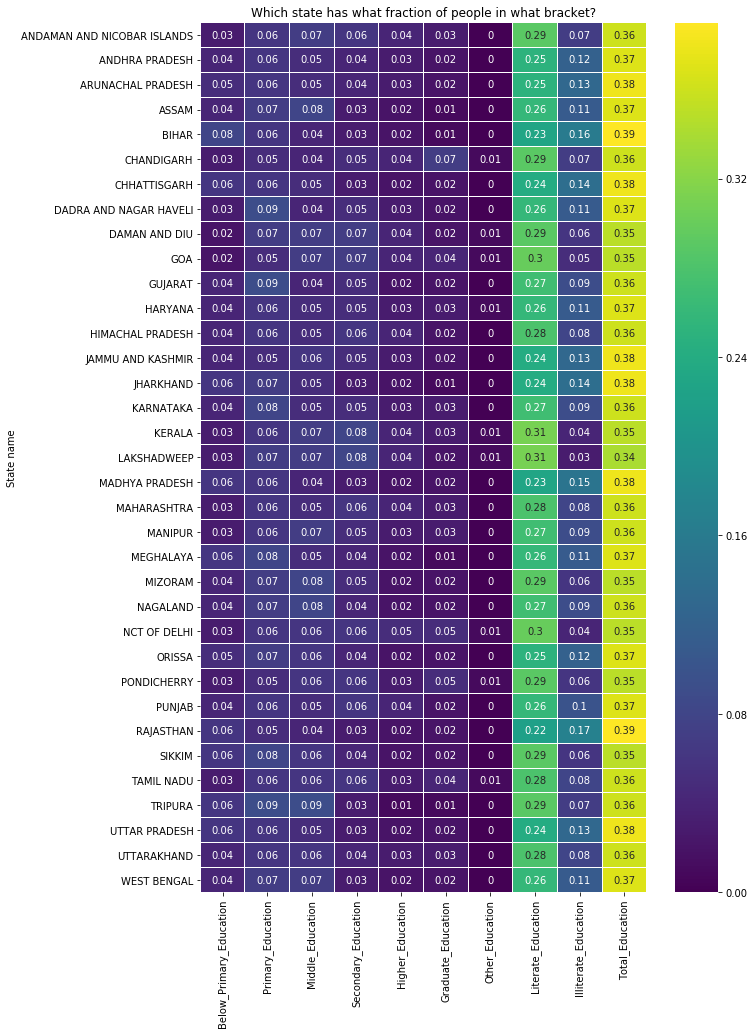

In [59]:
edu_col=[]
for col in df_2011.columns.values:
    if 'Education' in str(col):
        edu_col.append(col)
temp = df_2011[edu_col + ['State name']].groupby('State name').sum()

plt.figure(figsize=(10, 16))
sns.heatmap(np.round(temp.T / temp.sum(axis=1), 2).T, cmap='viridis',
             linewidths=0.01, linecolor='white', annot=True)
plt.title('Which state has what fraction of people in what bracket?')

# In Graduate section data is similar as decade before but in Below Primary Section Bihar has replaced Meghalaya from the top spot

# Working class distribution over states

Text(0.5, 1.0, 'Working class distribution over states.')

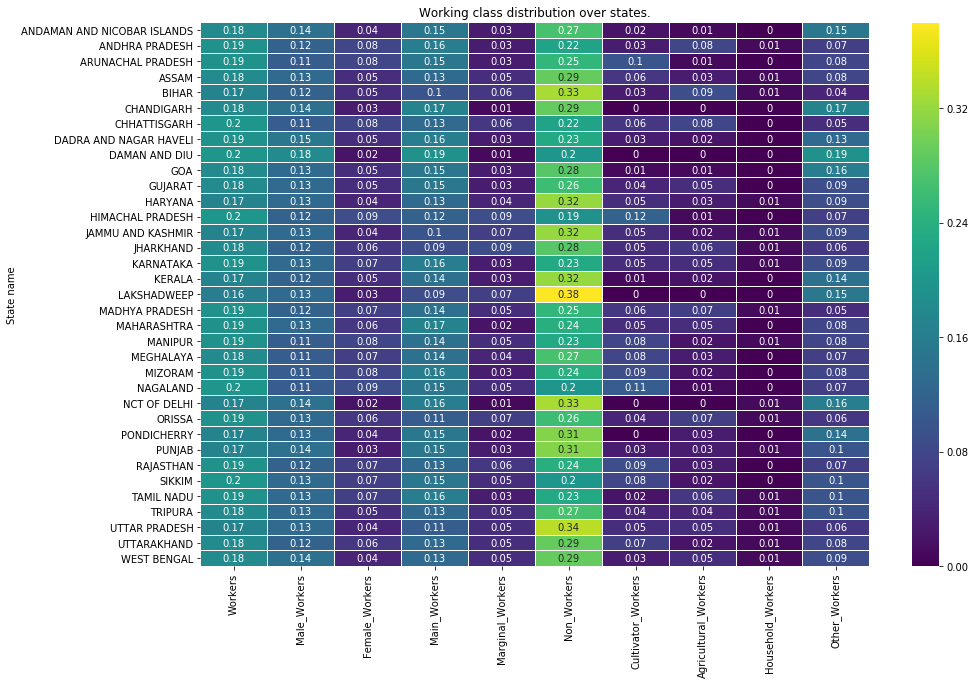

In [70]:
worker_cols=[]
for col in df_2011.columns.values:
    if 'Workers' in str(col):
        worker_cols.append(col)
temp = df_2011[worker_cols+['State name']].groupby('State name').sum()

plt.figure(figsize=(15, 10))

sns.heatmap(np.round(temp.T / temp.sum(axis=1), 2).T, linecolor='white',
            linewidths=0.01, cmap='viridis', annot=True)
plt.title('Working class distribution over states.')



# In Non- Workers category little improvment is seen in most of states,where Delhi has the least number of female workers and HP has the highest,UP has improved in terms of main_workers while Jharkhand is still at the bottom